<a href="https://colab.research.google.com/github/manojdhumal24/Machine-Learning/blob/master/heartdisease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
# Import all the tools we need

# Regular EDA (exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# we want our plots to appear inside the notebook
%matplotlib inline

# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

In [12]:
df = pd.read_csv("heart.csv")



In [13]:
df.shape # (rows, columns)

(303, 14)

In [15]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [17]:
df.sample(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
35,46,0,2,142,177,0,0,160,1,1.4,0,0,2,1
76,51,1,2,125,245,1,0,166,0,2.4,1,0,2,1
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
243,57,1,0,152,274,0,1,88,1,1.2,1,1,3,0
158,58,1,1,125,220,0,1,144,0,0.4,1,4,3,1


In [18]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [23]:

info = ["age","1: male, 0: female","chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic","resting blood pressure"," serum cholestoral in mg/dl","fasting blood sugar > 120 mg/dl","resting electrocardiographic results (values 0,1,2)"," maximum heart rate achieved","exercise induced angina","oldpeak = ST depression induced by exercise relative to rest","the slope of the peak exercise ST segment","number of major vessels (0-3) colored by flourosopy","thal: 3 = normal; 6 = fixed defect; 7 = reversable defect"]
for i in range(len(info)):
    print(df.columns[i]+":\t\t\t"+info[i])

age:			age
sex:			1: male, 0: female
cp:			chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic
trestbps:			resting blood pressure
chol:			 serum cholestoral in mg/dl
fbs:			fasting blood sugar > 120 mg/dl
restecg:			resting electrocardiographic results (values 0,1,2)
thalach:			 maximum heart rate achieved
exang:			exercise induced angina
oldpeak:			oldpeak = ST depression induced by exercise relative to rest
slope:			the slope of the peak exercise ST segment
ca:			number of major vessels (0-3) colored by flourosopy
thal:			thal: 3 = normal; 6 = fixed defect; 7 = reversable defect


In [24]:
df["target"].describe()


count    303.000000
mean       0.544554
std        0.498835
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: target, dtype: float64

In [25]:
df["target"].unique()


array([1, 0])

In [26]:
print(df.corr()["target"].abs().sort_values(ascending=False))


target      1.000000
exang       0.436757
cp          0.433798
oldpeak     0.430696
thalach     0.421741
ca          0.391724
slope       0.345877
thal        0.344029
sex         0.280937
age         0.225439
trestbps    0.144931
restecg     0.137230
chol        0.085239
fbs         0.028046
Name: target, dtype: float64


1    165
0    138
Name: target, dtype: int64


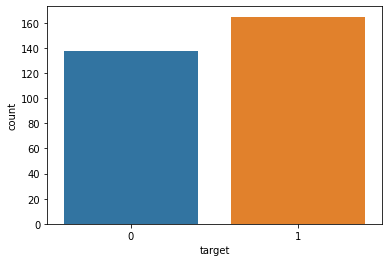

In [27]:
y = df["target"]

sns.countplot(y)


target_temp = df.target.value_counts()

print(target_temp)

In [28]:
print("Percentage of patience without heart problems: "+str(round(target_temp[0]*100/303,2)))
print("Percentage of patience with heart problems: "+str(round(target_temp[1]*100/303,2)))

#Alternatively,
# print("Percentage of patience with heart problems: "+str(y.where(y==1).count()*100/303))
# print("Percentage of patience with heart problems: "+str(y.where(y==0).count()*100/303))

# #Or,
# countNoDisease = len(df[df.target == 0])
# countHaveDisease = len(df[df.target == 1])

Percentage of patience without heart problems: 45.54
Percentage of patience with heart problems: 54.46


In [29]:
df["sex"].unique()


array([1, 0])

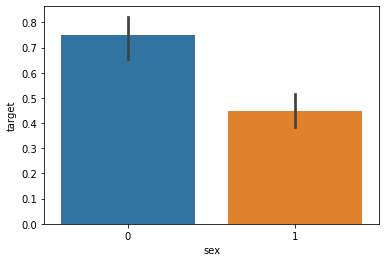

In [30]:
sns.barplot(df["sex"],y)


In [31]:
df["cp"].unique()


array([3, 2, 1, 0])

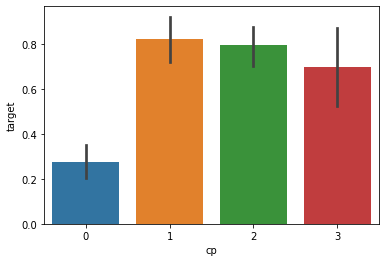

In [32]:
sns.barplot(df["cp"],y)


In [33]:
df["fbs"].describe()


count    303.000000
mean       0.148515
std        0.356198
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: fbs, dtype: float64

In [34]:
df["fbs"].unique()


array([1, 0])

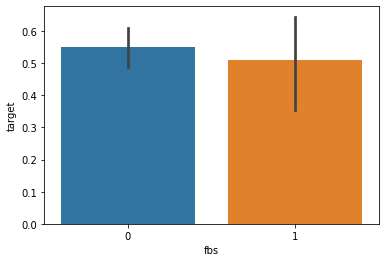

In [35]:
sns.barplot(df["fbs"],y)


In [36]:
df["restecg"].unique()


array([0, 1, 2])

In [37]:
df["exang"].unique()


array([0, 1])

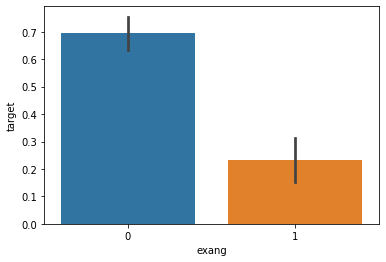

In [38]:
sns.barplot(df["exang"],y)


In [39]:
df["slope"].unique()


array([0, 2, 1])

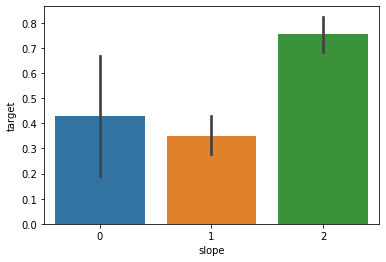

In [40]:
sns.barplot(df["slope"],y)


In [41]:
df["ca"].unique()


array([0, 2, 1, 3, 4])

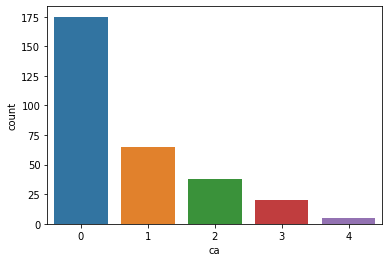

In [42]:
sns.countplot(df["ca"])


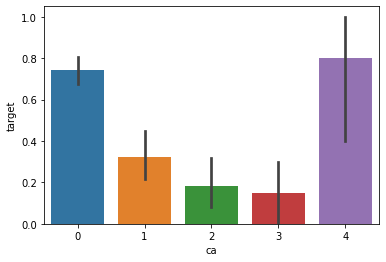

In [43]:
sns.barplot(df["ca"],y)


In [44]:
df["thal"].unique()


array([1, 2, 3, 0])

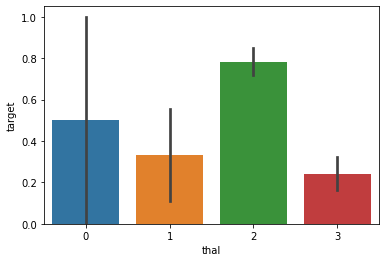

In [45]:
sns.barplot(df["thal"],y)


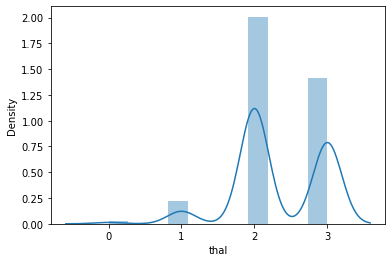

In [46]:
sns.distplot(df["thal"])


In [47]:
from sklearn.model_selection import train_test_split

predictors = df.drop("target",axis=1)
target = df["target"]

X_train,X_test,Y_train,Y_test = train_test_split(predictors,target,test_size=0.20,random_state=0)

In [48]:
X_train.shape


(242, 13)

In [49]:
X_test.shape


(61, 13)

In [50]:
Y_train.shape


(242,)

In [51]:
Y_test.shape


(61,)

In [52]:

from keras.models import Sequential
from keras.layers import Dense

In [53]:

model = Sequential()
model.add(Dense(11,activation='relu',input_dim=13))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [54]:
model.fit(X_train,Y_train,epochs=300)


Epoch 1/300
8/8 [==============================] - 1s 1ms/step - loss: 12.5361 - accuracy: 0.5717
Epoch 2/300
8/8 [==============================] - 0s 1ms/step - loss: 10.7418 - accuracy: 0.5588
Epoch 3/300
8/8 [==============================] - 0s 2ms/step - loss: 8.8883 - accuracy: 0.5511
Epoch 4/300
8/8 [==============================] - 0s 2ms/step - loss: 7.0190 - accuracy: 0.5720
Epoch 5/300
8/8 [==============================] - 0s 2ms/step - loss: 5.8242 - accuracy: 0.5346
Epoch 6/300
8/8 [==============================] - 0s 1ms/step - loss: 4.2717 - accuracy: 0.5350
Epoch 7/300
8/8 [==============================] - 0s 2ms/step - loss: 3.0306 - accuracy: 0.5390
Epoch 8/300
8/8 [==============================] - 0s 2ms/step - loss: 1.7106 - accuracy: 0.5867
Epoch 9/300
8/8 [==============================] - 0s 2ms/step - loss: 1.1658 - accuracy: 0.6114
Epoch 10/300
8/8 [==============================] - 0s 2ms/step - loss: 1.1041 - accuracy: 0.6317
Epoch 11/300
8/8 [=========

In [55]:
Y_pred_nn = model.predict(X_test)


In [56]:
Y_pred_nn.shape


(61, 1)

In [57]:
rounded = [round(x[0]) for x in Y_pred_nn]

Y_pred_nn = rounded